In [32]:
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('diabetes.csv')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
data = data[data['Glucose'] != 0]
data = data[data['BloodPressure'] != 0]
data = data[data['SkinThickness'] != 0]
data = data[data['Insulin'] != 0]
data = data[data['BMI'] != 0]
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


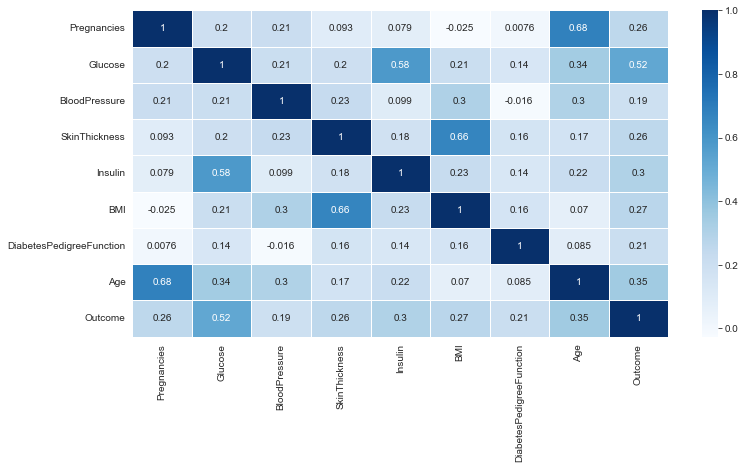

In [38]:
corr = data.corr()
fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5, ax=ax)
plt.show()

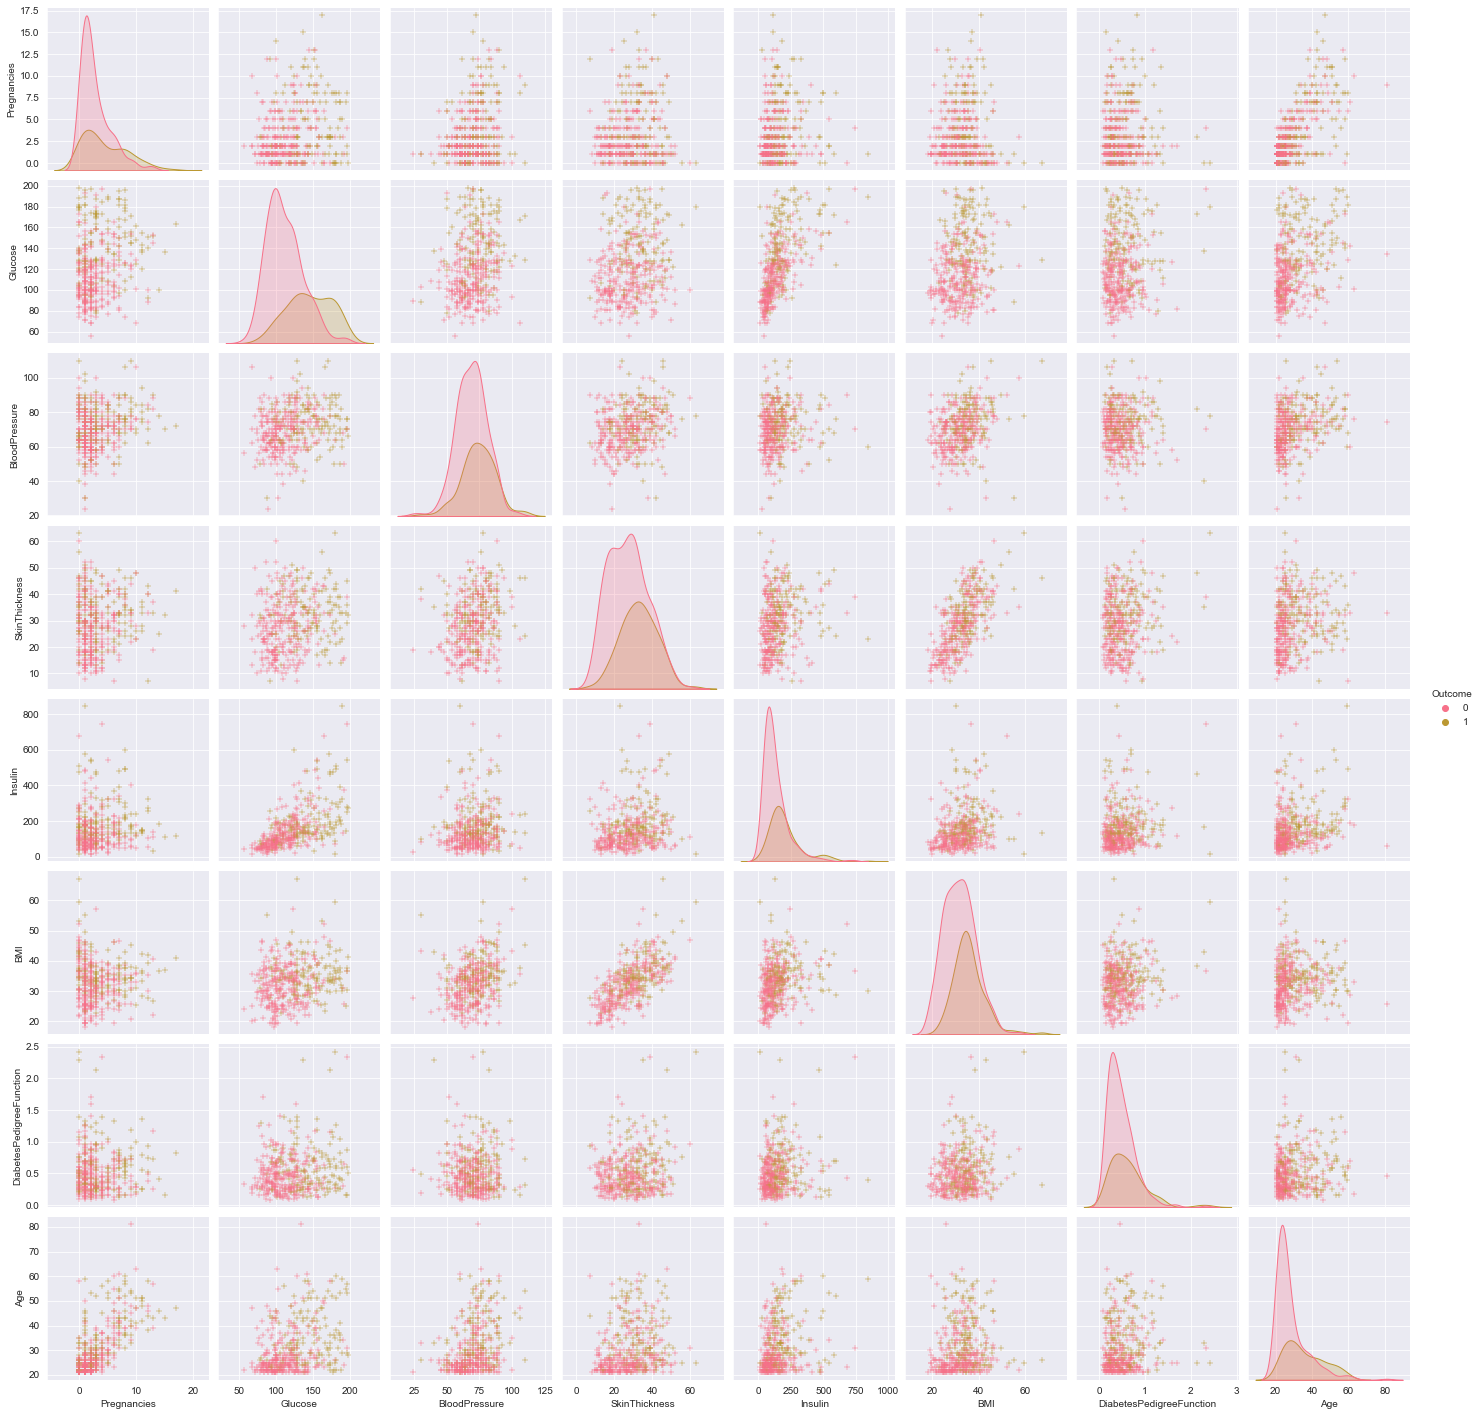

In [39]:
sns.set_palette('husl')
sns.pairplot(data, hue='Outcome', markers='+')

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

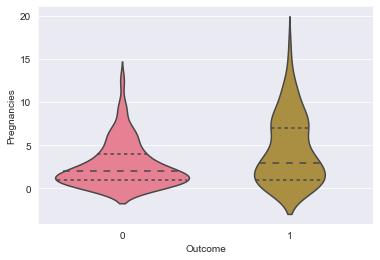

In [40]:
sns.violinplot(y='Pregnancies', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

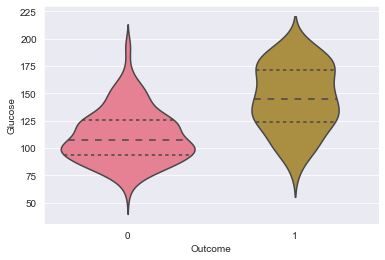

In [41]:
sns.violinplot(y='Glucose', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

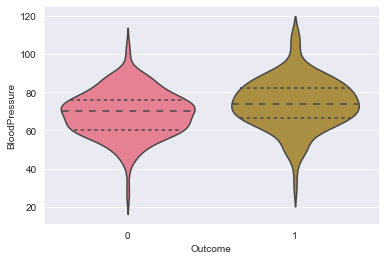

In [42]:
sns.violinplot(y='BloodPressure', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

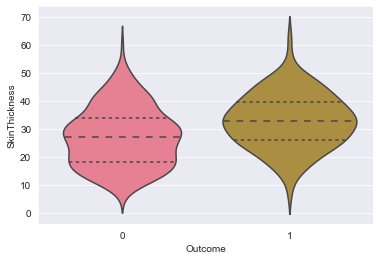

In [43]:
sns.violinplot(y='SkinThickness', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

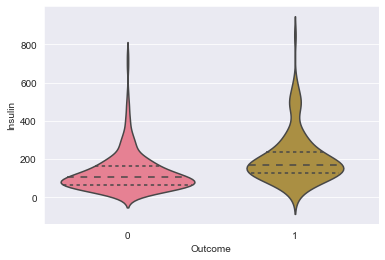

In [44]:
sns.violinplot(y='Insulin', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

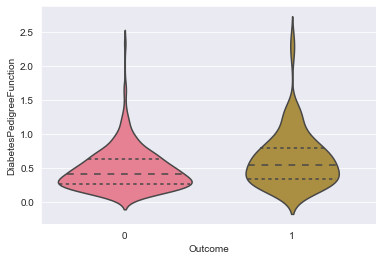

In [45]:
sns.violinplot(y='DiabetesPedigreeFunction', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

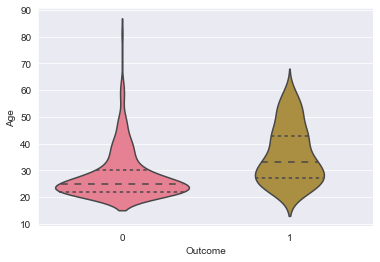

In [46]:
sns.violinplot(y='Age', x='Outcome', inner='quartile', data=data)

In [51]:
# Klasa statyczna zawierająca metody przydatne to przetwarzania danych
class ProcessingData:

    # metoda tasująca wiersze pd.DataFrame
    @staticmethod
    def shuffle(df: pd.DataFrame) -> pd.DataFrame:
        """
        Receives a DataFrame, randomly shuffles it and returns a shuffled version.
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        for idx in range(len(df) - 1, 0, -1):
            rand_idx = random.randint(0, idx)
            df.iloc[idx], df.iloc[rand_idx] = df.iloc[rand_idx], df.iloc[idx]
        return df.reset_index(drop=True)

    # metoda normalizująca kolumny pd.DataFrame za pomocą normalizacji z użyciem odchylenia standardowego
    @staticmethod
    def normalize_std(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using min-max normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        normalized = df.drop(labels=label, axis=1)
        normalized = (normalized-normalized.mean())/(normalized.std())
        return normalized.join(df[label])

    # metoda normalizująca kolumny pd.DataFrame za pomocą normalizacji minmax
    @staticmethod
    def normalize_minmax(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using min-max normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        normalized = df.drop(labels=label, axis=1)
        normalized = (normalized-normalized.min())/(normalized.max()-normalized.min())
        return normalized.join(df[label])

    # metoda dzieląca pd.DataFrame na zbiór treningowy oraz walidacyjny
    @staticmethod
    def split(df: pd.DataFrame, ratio: float) -> tuple[pd.DataFrame, pd.DataFrame]:
        """
        Receives a DataFrame and returns two dataframes, split into training and validation DataFrames.
        :param df: pd.DataFrame
        :param ratio: float
        :return training_df, validation_df: tuple[pd.DataFrame, pd.DataFrame]
        """
        cutoff = int(len(df) * ratio)
        return df[:cutoff].reset_index(drop=True), df[cutoff:].reset_index(drop=True)

In [52]:
# Test metod klasy ProcessingData
shuffled_data = ProcessingData.shuffle(data)
shuffled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,125,60,20,140,33.8,0.088,31,0
1,2,99,70,16,44,20.4,0.235,27,0
2,1,86,66,52,65,41.3,0.917,29,0
3,0,179,50,36,159,37.8,0.455,22,1
4,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
387,1,100,66,15,56,23.6,0.666,26,0
388,11,136,84,35,130,28.3,0.260,42,1
389,2,107,74,30,100,33.6,0.404,23,0
390,0,198,66,32,274,41.3,0.502,28,1


In [53]:
normalized_data_std = ProcessingData.normalize_std(shuffled_data, 'Outcome')
normalized_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.405123,0.076876,-0.853328,-0.869631,-0.135105,0.101567,-1.259221,0.013254,0
1,-0.405123,-0.765617,-0.053078,-1.249988,-0.942902,-1.805185,-0.833736,-0.378873,0
2,-0.716511,-1.186864,-0.373178,2.173228,-0.766197,1.168778,1.140283,-0.182809,0
3,-1.027899,1.826670,-1.653578,0.651799,0.024771,0.670746,-0.196956,-0.869031,1
4,-0.405123,2.409934,-0.053078,1.507603,3.255961,-0.368007,-1.056609,2.169953,1
...,...,...,...,...,...,...,...,...,...
387,-0.716511,-0.733214,-0.373178,-1.345078,-0.841928,-1.349841,0.413774,-0.476904,0
388,2.397372,0.433315,1.067272,0.556709,-0.219251,-0.681055,-0.761375,1.091604,1
389,-0.405123,-0.506389,0.267022,0.081263,-0.471687,0.073108,-0.344573,-0.771000,0
390,-1.027899,2.442338,-0.373178,0.271441,0.992445,1.168778,-0.060916,-0.280841,1


In [54]:
# Test dla normalizacji std
normalized_training_data_std, normalized_validation_data_std = ProcessingData.split(normalized_data_std, 0.7)
normalized_training_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.405123,0.076876,-0.853328,-0.869631,-0.135105,0.101567,-1.259221,0.013254,0
1,-0.405123,-0.765617,-0.053078,-1.249988,-0.942902,-1.805185,-0.833736,-0.378873,0
2,-0.716511,-1.186864,-0.373178,2.173228,-0.766197,1.168778,1.140283,-0.182809,0
3,-1.027899,1.826670,-1.653578,0.651799,0.024771,0.670746,-0.196956,-0.869031,1
4,-0.405123,2.409934,-0.053078,1.507603,3.255961,-0.368007,-1.056609,2.169953,1
...,...,...,...,...,...,...,...,...,...
269,-0.405123,-0.571196,-1.013378,1.032156,-0.522175,0.258091,-0.862681,-0.574936,0
270,-1.027899,0.109279,1.067272,-0.013827,0.495987,-0.339548,-0.008816,-0.672968,0
271,1.151819,-1.348882,0.587122,1.032156,-0.909244,1.937171,-0.758480,1.091604,0
272,-0.716511,0.076876,-1.653578,1.032156,0.092088,0.030419,1.270533,-0.280841,1


In [55]:
normalized_validation_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-1.027899,-0.117546,-0.533228,-1.059810,-0.539004,0.258091,0.584547,-0.771000,0
1,-0.405123,0.206490,0.267022,-0.299095,0.411841,0.016190,0.196690,-0.574936,0
2,-1.027899,2.118302,0.907222,-1.440167,0.243550,-0.154564,0.460086,-0.869031,1
3,-1.027899,0.400912,-0.213128,1.222335,0.790496,1.311073,-0.457457,-0.672968,1
4,-0.405123,-0.960039,-0.533228,0.271441,0.033186,0.699205,0.436930,-0.771000,1
...,...,...,...,...,...,...,...,...,...
113,-0.716511,-0.733214,-0.373178,-1.345078,-0.841928,-1.349841,0.413774,-0.476904,0
114,2.397372,0.433315,1.067272,0.556709,-0.219251,-0.681055,-0.761375,1.091604,1
115,-0.405123,-0.506389,0.267022,0.081263,-0.471687,0.073108,-0.344573,-0.771000,0
116,-1.027899,2.442338,-0.373178,0.271441,0.992445,1.168778,-0.060916,-0.280841,1


In [56]:
normalized_data_minmax = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
normalized_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.117647,0.485915,0.418605,0.232143,0.151442,0.319018,0.001285,0.166667,0
1,0.117647,0.302817,0.534884,0.160714,0.036058,0.044990,0.064240,0.100000,0
2,0.058824,0.211268,0.488372,0.803571,0.061298,0.472393,0.356317,0.133333,0
3,0.000000,0.866197,0.302326,0.517857,0.174279,0.400818,0.158458,0.016667,1
4,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.031263,0.533333,1
...,...,...,...,...,...,...,...,...,...
387,0.058824,0.309859,0.488372,0.142857,0.050481,0.110429,0.248822,0.083333,0
388,0.647059,0.563380,0.697674,0.500000,0.139423,0.206544,0.074946,0.350000,1
389,0.117647,0.359155,0.581395,0.410714,0.103365,0.314928,0.136617,0.033333,0
390,0.000000,1.000000,0.488372,0.446429,0.312500,0.472393,0.178587,0.116667,1


In [57]:
# Test dla normalizacji minmax
normalized_training_data_minmax, normalized_validation_data_minmax = ProcessingData.split(normalized_data_minmax, 0.7)
normalized_training_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.117647,0.485915,0.418605,0.232143,0.151442,0.319018,0.001285,0.166667,0
1,0.117647,0.302817,0.534884,0.160714,0.036058,0.044990,0.064240,0.100000,0
2,0.058824,0.211268,0.488372,0.803571,0.061298,0.472393,0.356317,0.133333,0
3,0.000000,0.866197,0.302326,0.517857,0.174279,0.400818,0.158458,0.016667,1
4,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.031263,0.533333,1
...,...,...,...,...,...,...,...,...,...
269,0.117647,0.345070,0.395349,0.589286,0.096154,0.341513,0.059957,0.066667,0
270,0.000000,0.492958,0.697674,0.392857,0.241587,0.255624,0.186296,0.050000,0
271,0.411765,0.176056,0.627907,0.589286,0.040865,0.582822,0.075375,0.350000,0
272,0.058824,0.485915,0.302326,0.589286,0.183894,0.308793,0.375589,0.116667,1


In [58]:
normalized_validation_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.000000,0.443662,0.465116,0.196429,0.093750,0.341513,0.274090,0.033333,0
1,0.117647,0.514085,0.581395,0.339286,0.229567,0.306748,0.216702,0.066667,0
2,0.000000,0.929577,0.674419,0.125000,0.205529,0.282209,0.255675,0.016667,1
3,0.000000,0.556338,0.511628,0.625000,0.283654,0.492843,0.119914,0.050000,1
4,0.117647,0.260563,0.465116,0.446429,0.175481,0.404908,0.252248,0.033333,1
...,...,...,...,...,...,...,...,...,...
113,0.058824,0.309859,0.488372,0.142857,0.050481,0.110429,0.248822,0.083333,0
114,0.647059,0.563380,0.697674,0.500000,0.139423,0.206544,0.074946,0.350000,1
115,0.117647,0.359155,0.581395,0.410714,0.103365,0.314928,0.136617,0.033333,0
116,0.000000,1.000000,0.488372,0.446429,0.312500,0.472393,0.178587,0.116667,1


In [59]:
# Klasa NaiveBayes zawierająca klasyfikator Bayesa oraz metody pomocnicze
from functools import reduce


class NaiveBayes:
    """
    labels - stores all the labels existing within the column that we want to predict
    values - stores the mean and standard deviation values of all the columns and labels into the class attribute values
    """
    labels: list[str] = []
    values: list[list[list[float, float]]] = []

    # metoda pomocnicza licząca średnią wartość w kolumnie
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda pomocnicza licząca odchylenie standardowe wartości w kolumnie
    @staticmethod
    def std_dev(column: list[float], m: float) -> float:
        """
        Receives a column of the dataframe and its mean value and returns its standard deviation.
        :param column: list[float]
        :param m: float
        :return standard deviation of the values in a dataframe column: float
        """
        return math.sqrt(sum(map(lambda x: (x - m) ** 2, column)) / len(column))

    # metoda pomocnicza obliczająca gęstość prawdopodobieństwa
    @staticmethod
    def density(x: float, m: float, sd: float) -> float:
        """
        Receives a value, plus a mean value and a standard deviation of the values in a certain column, and returns its Gaussian probability.
        :param x: float
        :param m: float
        :param sd: float
        :return Gaussian probability: float
        """
        return math.exp(-(x - m) ** 2 / (2 * sd ** 2)) / (math.sqrt(2 * math.pi) * sd)

    # metoda obliczająca wartości przechowywane w tablicach pomocniczych klasy
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and loads mean and standard deviation values into the class attribute values.
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.values = []
        self.labels = df[label].unique()
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            column = [[self.mean(item), self.std_dev(item, self.mean(item))] for _, item in category_values.items()]
            self.values.append(column)

    # metda przewidująca etykiety klas próbek
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label.
        :param sample: pd.Series
        :param label: str - column with class labels
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category in self.values:
            category_pairs = []
            for pair, x in zip(category, sample):
                category_pairs.append(self.density(x, pair[0], pair[1]))
            probabilities.append(reduce(lambda z, y: z * y, category_pairs))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność przewidywań
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str - column with class labels
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [60]:
# Test Bayesa dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'Outcome')
    NB.test(normalized_validation_data, 'Outcome')

Accuracy: 73.73%; 87/118
Accuracy: 76.27%; 90/118
Accuracy: 68.64%; 81/118
Accuracy: 76.27%; 90/118
Accuracy: 73.73%; 87/118


In [61]:
# Test Bayesa dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'Outcome')
    NB.test(normalized_validation_data, 'Outcome')

Accuracy: 72.88%; 86/118
Accuracy: 78.81%; 93/118
Accuracy: 75.42%; 89/118
Accuracy: 72.03%; 85/118
Accuracy: 77.12%; 91/118


In [62]:
# Test Bayesa dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(training_data, 'Outcome')
    NB.test(validation_data, 'Outcome')

Accuracy: 79.66%; 94/118
Accuracy: 77.12%; 91/118
Accuracy: 80.51%; 95/118
Accuracy: 72.03%; 85/118
Accuracy: 69.49%; 82/118


In [64]:
# Klasa statyczna KNN zawierająca klasyfikator KNN oraz metody pomocnicze
from collections import Counter

class KNN:

    # metoda obliczająca odległość między próbkami za pomocą metryki
    @staticmethod
    def distance(x: pd.Series, y: pd.Series, m: int, label: str) -> float:
        """
        :param x: pd.Series - a record from a dataset to calculate the distance
        :param y: pd.Series - a record from a dataset to calculate the distance
        :param m: int - to calculate the mth root in Euclidean metric
        :param label: str - column with class labels
        :return: float - the distance between two records
        """
        s = 0
        x = x.drop(labels=label)
        y = y.drop(labels=label)
        for xi, yi in zip(x, y):
            s += pow(abs(xi - yi), m)
        return pow(s, 1 / m)

    # metoda przewidująca etykietę klasy próbki na podstawie etykiet jej k-najbliższych sąsiadów
    @staticmethod
    def cluster(sample: pd.Series, training_set: pd.DataFrame, k: int, m: int, label: str) -> str:
        """
        :param sample: pd.Series - a record from the validation dataset
        :param training_set: pd.DataFrame - training dataset
        :param k: int - k-nearest elements
        :param m: int - to pass into KNN.distance
        :param label: str - name of the label that we want to predict
        :return: str - predicted label of the object
        """
        distances = [(KNN.distance(sample, training_set.iloc[idx], m, label), training_set.iloc[idx][label]) for idx in training_set.index]
        distances = sorted(distances, key=lambda d: (d, random.random()))[:k]
        return max(dict(Counter(elem[1] for elem in distances)))

    # metoda testująca dokładność działania
    @staticmethod
    def test(training_set: pd.DataFrame, validation_set: pd.DataFrame, k0: int, kn: int, m: int, label: str) -> None:
        """
        :param training_set: pd.Series - a record from the validation dataset
        :param validation_set: pd.DataFrame - training dataset
        :param k0: int - starting value of k to pass into KNN.cluster
        :param kn: int - end value of k to pass into KNN.cluster
        :param m: int - to pass into KNN.cluster
        :param label: str - name of the label that we want to predict
        :return: None
        """
        for k in range(k0, kn + 1):
            correct = 0
            for sample in validation_set.iloc:
                x = KNN.cluster(sample, training_set, k, m, label)
                if x == sample[label]:
                    correct += 1
            print(f'Accuracy for {k=}: {float(correct) / len(validation_set) * 100:.2f}%, correct predictions: {correct}/{len(validation_set)}')

In [65]:
# Test KNN dla danych znormalizowanych std:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=2, kn=4, m=2, label='Outcome')

Accuracy for k=2: 72.03%, correct predictions: 85/118
Accuracy for k=3: 73.73%, correct predictions: 87/118
Accuracy for k=4: 69.49%, correct predictions: 82/118
Accuracy for k=2: 75.42%, correct predictions: 89/118
Accuracy for k=3: 66.95%, correct predictions: 79/118
Accuracy for k=4: 58.47%, correct predictions: 69/118


In [66]:
# Test KNN dla danych znormalizowanych minmax:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=2, kn=4, m=2, label='Outcome')

Accuracy for k=2: 74.58%, correct predictions: 88/118
Accuracy for k=3: 74.58%, correct predictions: 88/118
Accuracy for k=4: 72.03%, correct predictions: 85/118
Accuracy for k=2: 72.03%, correct predictions: 85/118
Accuracy for k=3: 66.95%, correct predictions: 79/118
Accuracy for k=4: 61.86%, correct predictions: 73/118


In [67]:
# Test KNN dla danych nieznormalizowanych:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    KNN.test(training_set=training_data, validation_set=validation_data, k0=2, kn=4, m=2, label='Outcome')

Accuracy for k=2: 63.56%, correct predictions: 75/118
Accuracy for k=3: 55.93%, correct predictions: 66/118
Accuracy for k=4: 51.69%, correct predictions: 61/118
Accuracy for k=2: 68.64%, correct predictions: 81/118
Accuracy for k=3: 61.86%, correct predictions: 73/118
Accuracy for k=4: 62.71%, correct predictions: 74/118


In [68]:
# Klasa SoftSetClassifierMean zawierająca klasyfikator miękki korzystający ze średniej arytmetycznej oraz metody pomocnicze
class SoftSetClassifierMean:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores 0 and 1 pairs for every label for every column
    means - stores mean values for every label for every column
    """
    labels: list[str] = []
    pairs: list[list[list[int, int]]] = []
    means: list[list[float]] = []

    # metoda pomocnicza obliczająca średnie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda tworząca tabelę ważoną zbioru miękkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.means = []
        self.labels = sorted(df[label].unique())
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_mean = []
            temp_pair = []
            for _, item in category_values.items():
                mean = self.mean(item)
                temp_mean.append(mean)
                len_lower = 0
                len_upper = 0
                for value in item:
                    if value > mean:
                        len_upper += 1
                    else:
                        len_lower += 1
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                else:
                    temp_pair.append([0, 1])

            self.means.append(temp_mean)
            self.pairs.append(temp_pair)

    # metoda przewidująca etykietę klasy próbki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category, mean in zip(self.pairs, self.means):
            sample_pairs = []
            for m, x in zip(mean, sample):
                if x == m:
                    sample_pairs.append(random.choice(([0, 1],[1, 0])))
                elif x > m:
                    sample_pairs.append([1, 0])
                else:
                    sample_pairs.append([0, 1])
            temp = []
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność działania Klasyfikatora miękkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [69]:
# Test Klasyfikatora miękkiego ze średnią dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 58.47%; 69/118
Accuracy: 61.02%; 72/118
Accuracy: 68.64%; 81/118
Accuracy: 55.08%; 65/118
Accuracy: 35.59%; 42/118


In [70]:
# Test Klasyfikatora miękkiego ze średnią dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 62.71%; 74/118
Accuracy: 36.44%; 43/118
Accuracy: 41.53%; 49/118
Accuracy: 58.47%; 69/118
Accuracy: 52.54%; 62/118


In [71]:
# Test Klasyfikatora miękkiego ze średnią dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(training_data, 'Outcome')
    SSC.test(validation_data, 'Outcome')

Accuracy: 58.47%; 69/118
Accuracy: 44.92%; 53/118
Accuracy: 44.92%; 53/118
Accuracy: 38.14%; 45/118
Accuracy: 33.90%; 40/118


In [74]:
# Klasa SoftSetClassifierPercentage zawierająca klasyfikator miękki korzystający z procentów oraz metody pomocnicze
class SoftSetClassifierPercentage:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores pairs of values between 0 and 1 for every label for every column
    minmaxs - stores min and max pairs of values for every label for every column
    """
    labels: list[str] = []
    pairs: list[list[list[int, int]]] = []
    minmaxs: list[list[list[float, float]]] = []

     # metoda pomocnicza obliczająca średnie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda tworząca tabelę ważoną zbioru miękkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.minmaxs = []
        self.labels = sorted(df[label].unique())
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_minmax = []
            temp_pair = []
            for _, item in category_values.items():
                min_t = min(item)
                max_t = max(item)
                temp_minmax.append([min_t, max_t])
                mean = self.mean(item)
                len_lower = 0
                len_upper = 0
                for value in item:
                    if value > mean:
                        len_upper += 1
                    else:
                        len_lower += 1
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                else:
                    temp_pair.append([0, 1])

            self.minmaxs.append(temp_minmax)
            self.pairs.append(temp_pair)

    # metoda przewidująca etykietę klasy próbki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category, minmax in zip(self.pairs, self.minmaxs):
            sample_pairs = []
            for pair, x in zip(minmax, sample):
                proportion = (x - pair[0]) / (pair[1] - pair[0])
                sample_pairs.append([1 - proportion, proportion])
            temp = []
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność działania Klasyfikatora miękkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [75]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 38.98%; 46/118
Accuracy: 68.64%; 81/118
Accuracy: 66.10%; 78/118
Accuracy: 33.90%; 40/118
Accuracy: 63.56%; 75/118


In [76]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 65.25%; 77/118
Accuracy: 66.95%; 79/118
Accuracy: 74.58%; 88/118
Accuracy: 69.49%; 82/118
Accuracy: 34.75%; 41/118


In [77]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(training_data, 'Outcome')
    SSC.test(validation_data, 'Outcome')

Accuracy: 43.22%; 51/118
Accuracy: 68.64%; 81/118
Accuracy: 56.78%; 67/118
Accuracy: 72.88%; 86/118
Accuracy: 37.29%; 44/118


In [ ]:
# Klasa FuzzyClassifier zawierająca klasyfikator zbiorów rozmytych oraz metody pomocnicze